In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
from scipy.stats import kstest
from scipy.stats import lognorm

Инсульт - это заболевание, при котором нарушение кровоснабжения мозга приводит к гибели клеток. Существует два основных типа инсульта: ишемический - из-за недостатка кровотока, и геморрагический - из-за кровотечения. В обоих случаях части мозга перестают функционировать должным образом. Признаки и симптомы инсульта могут включать неспособность двигаться или чувствовать одну сторону тела, проблемы с пониманием или речью, головокружение или потерю зрения с одной стороны. Зачастую такие признаки и симптомы обнаруживаются вскоре после инсульта. Если симптомы длятся менее одного-двух часов, инсульт является транзиторной ишемической атакой (ТИА), также называемой мини-инсультом. Геморрагический инсульт также может сопровождаться сильной головной болью. Симптомы инсульта могут быть постоянными. Долгосрочные осложнения могут включать пневмонию и потерю контроля над мочевым пузырем. Инсульт или ТИА часто требуют неотложной помощи.

Основным фактором риска инсульта является высокое кровяное давление. К другим факторам риска относятся высокий уровень холестерина в крови, табакокурение, ожирение, сахарный диабет, перенесенный ранее ТИА, конечная стадия болезни почек и фибрилляция предсердий. Кровотечение может произойти из-за разрыва аневризмы головного мозга.

Профилактика включает в себя снижение факторов риска, хирургическое вмешательство для открытия артерий к мозгу у тех, кто имеет проблемное сужение сонных артерий, и прием варфарина у людей с фибрилляцией предсердий. Врачи могут рекомендовать аспирин или статины для профилактики.

# Данные

В качестве набора данных использовались данные электронной медицинской карты (ЭМЗ), контролируемой компанией McKinsey & Company. Собранные данные содержали информацию о 29 072 пациентах, имеющих 11 общих атрибутов.

Из 11 атрибутов 10 являются входными признаками, включая:
-возраст, 
-пол, 
-семейное положение, 
-тип работы, 
-место проживания (город/сельская местность),
-бинарный признак наличия сердечно-сосудистых заболеваний,
-индекс массы тела,
-статус курильшика пациента, уровень глюкозы и бинарный атрибут гипертонии, указывающий на то, страдает ли пациент гипертонией или нет. 11-й атрибут является бинарным выходным атрибутом, указывающим на наличие или отсутствие у пациента инсульта.



In [3]:
df = pd.read_csv(r'C:\Users\imphi\OneDrive\Documents\py-hse\sci_prog\stroke\brain_stroke.csv')

В датасете 4981 строк.

In [4]:
df.shape

(4981, 11)

In [5]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [6]:
target = df['stroke']

Пропущенных значений в датасете нет.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Посмотрим на том, в каком диапазоне дежат значения атрибутов:


In [8]:
for columns in df:
    unique = df.drop_duplicates(subset=[columns])
    print(columns, "\n", unique[columns], "\n\n")

gender 
 0      Male
2    Female
Name: gender, dtype: object 


age 
 0       67.00
1       80.00
2       49.00
3       79.00
4       81.00
        ...  
1505     1.48
1821     0.56
1914     1.32
3363     0.16
3772     0.48
Name: age, Length: 104, dtype: float64 


hypertension 
 0    0
3    1
Name: hypertension, dtype: int64 


heart_disease 
 0    1
2    0
Name: heart_disease, dtype: int64 


ever_married 
 0    Yes
6     No
Name: ever_married, dtype: object 


work_type 
 0            Private
3      Self-employed
9           Govt_job
205         children
Name: work_type, dtype: object 


Residence_type 
 0    Urban
1    Rural
Name: Residence_type, dtype: object 


avg_glucose_level 
 0       228.69
1       105.92
2       171.23
3       174.12
4       186.21
         ...  
4974     84.94
4975    215.07
4977    191.15
4978     95.02
4979     83.94
Name: avg_glucose_level, Length: 3895, dtype: float64 


bmi 
 0       36.6
1       32.5
2       34.4
3       24.0
4       29.0
        ...

# Описание признаков
**Возраст и гендер**


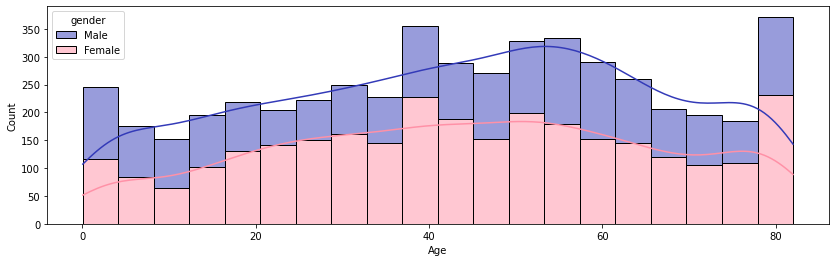

In [55]:
plt.figure(figsize=(14,4))
sns.histplot(data=df, x='age', hue='gender', multiple='stack', kde=True, palette=dict(Female='#ff91a7', Male='#333ab8'))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Самому молодому респонденту нет и 1 года; самому взрослому - 82 года.

In [10]:
df.age.describe()

count    4981.000000
mean       43.419859
std        22.662755
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

Женщин в выборке больше, чем мужчин. Определенный дисбаланс наблюдается во всех категориях.

In [11]:
print(df.gender.value_counts())

Female    2907
Male      2074
Name: gender, dtype: int64


**Уровень глюкозы**


C:\Users\imphi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


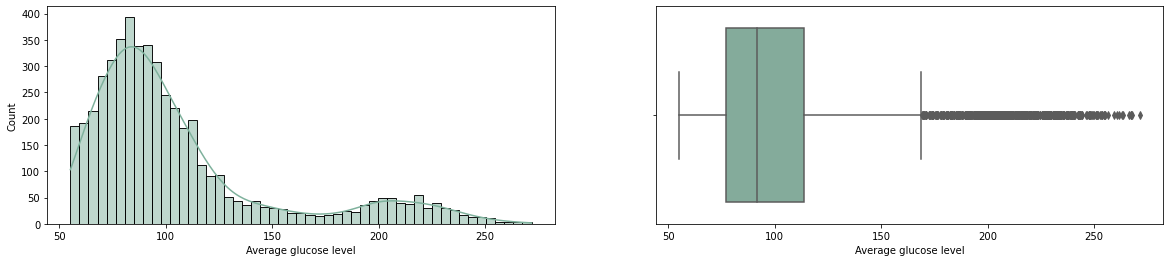

In [56]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
sns.histplot(df.avg_glucose_level, color='#7eb19c', kde=True)
plt.xlabel('Average glucose level')

plt.subplot(1, 2, 2)
sns.boxplot(df.avg_glucose_level, color='#7eb19c')
plt.xlabel('Average glucose level')

plt.suptitle('Average glucose level distribution')
plt.show()

In [13]:
df.avg_glucose_level.describe()

count    4981.000000
mean      105.943562
std        45.075373
min        55.120000
25%        77.230000
50%        91.850000
75%       113.860000
max       271.740000
Name: avg_glucose_level, dtype: float64

Для показателя среднего уровня глюкозы гистограмма смещена: среднее значение - 105, медианное значение - 91.

**BMI**


C:\Users\imphi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


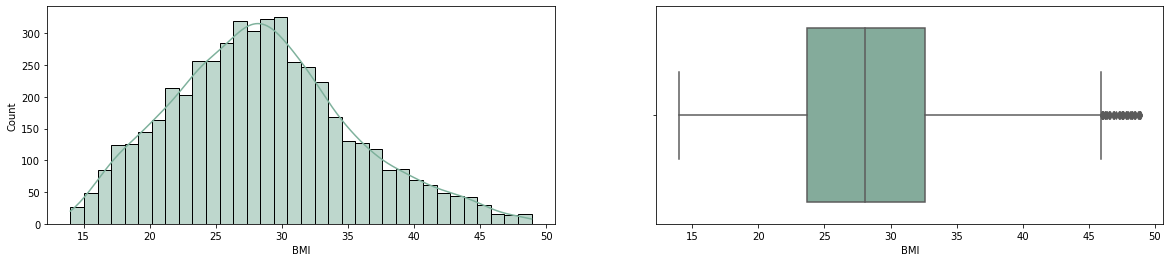

In [57]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
sns.histplot(df.bmi, color='#7eb19c', kde=True)
plt.xlabel('BMI')

plt.subplot(1, 2, 2)
sns.boxplot(df.bmi, color='#7eb19c')
plt.xlabel('BMI')

plt.show()

In [15]:
df.bmi.describe()

count    4981.000000
mean       28.498173
std         6.790464
min        14.000000
25%        23.700000
50%        28.100000
75%        32.600000
max        48.900000
Name: bmi, dtype: float64

Для показателя индекса массы тела распределение больше похоже на нормальное: среднее значение - 105, медианное значение - 91.

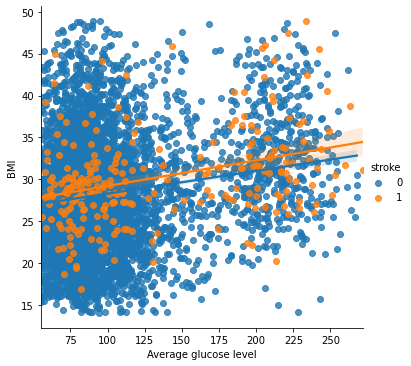

In [58]:
sns.lmplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df)
plt.xlabel('Average glucose level')
plt.ylabel('BMI')
plt.show()

### Бинарные признаки

In [17]:
binary_feat = list()

for columns in df:
    unique = df.drop_duplicates(subset=[columns])
    if len(unique) == 2 and columns not in ['stroke', 'gender']:
        binary_feat.append(columns)
        
print(binary_feat)

['hypertension', 'heart_disease', 'ever_married', 'Residence_type']


C:\Users\imphi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\imphi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\imphi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\imphi\anaconda3\lib\si

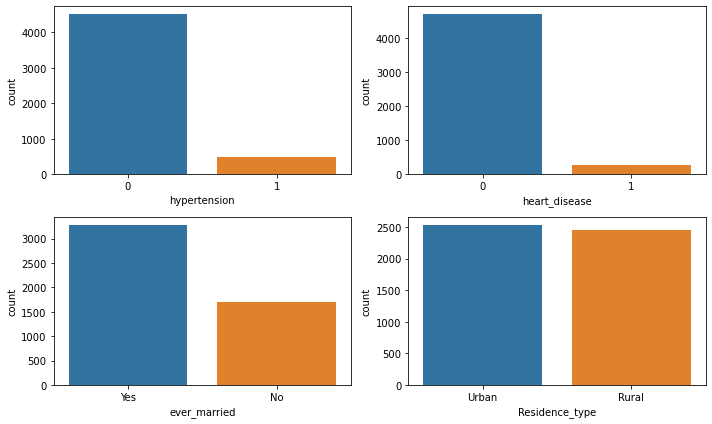

In [59]:


fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.suptitle('Binary Variables')

for feature, ax in zip(binary_feat, axes.flatten()):
    sns.countplot(df[feature], ax=ax)

plt.tight_layout()



Распределение значений в бинарных признаках довольно несбалансировано: так пациентов с гипертонией и сердечными заболеваниями в выборке гораздо меньше, чем пациентов без данных болезней. Также в датасете представлено больше данных от людей, которые были или находятся в браке. Тем не менее количество сельских и городоских жителей в выборке примерно одинаковое.

### Категориальные признаки

In [19]:
category_feat = list()

for columns in df:
    unique = df.drop_duplicates(subset=[columns])
    if columns not in ['stroke', 'gender', 'bmi', 'avg_glucose_level', 'age'] and columns not in binary_feat:
        category_feat.append(columns)
        
print(category_feat)

['work_type', 'smoking_status']


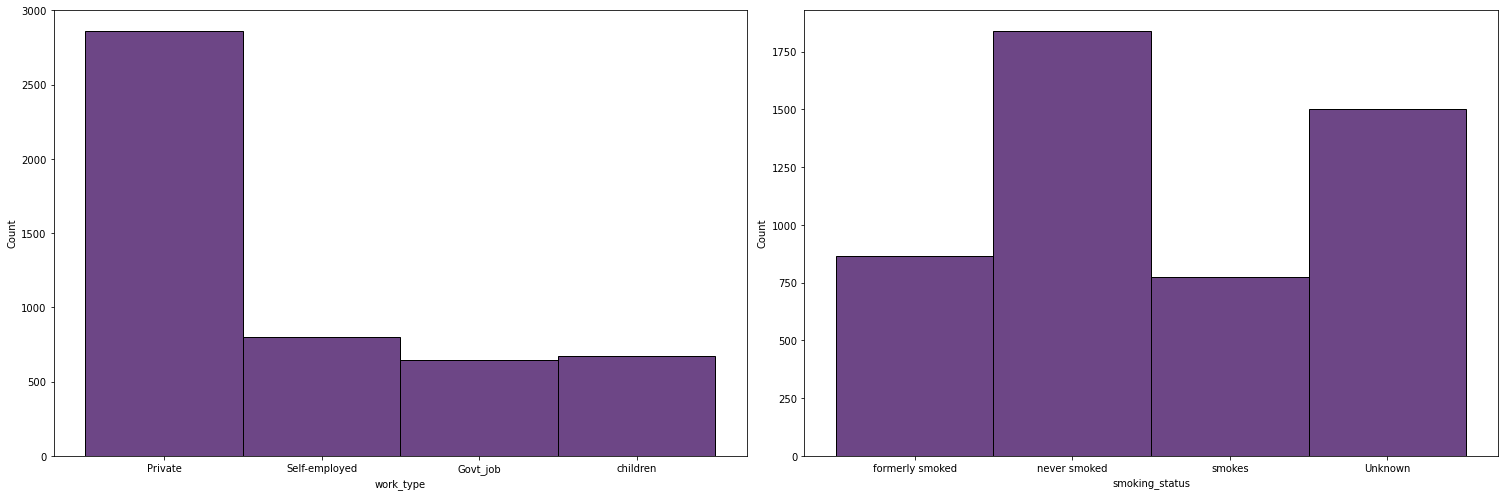

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(21, 7))

for feature, ax in zip(category_feat, axes.flatten()):
    sns.histplot(df[feature], ax=ax, color='#3c085e')

plt.tight_layout()



Среди респондентов количество тех, кто работает в частных предприятиях, превышает самозанятых, госслужащих и тех, кто занимается уходом за детьми.
В выборке много пациентов, чей статус, как курильщиков, неизвестен. Тем не менее среди опрошенных больше всего именно тех, кто не курил никогда, а тех, кто курит сейчас и курил раньше - примерно одинаковое количество.

### Признак наличия инсульта

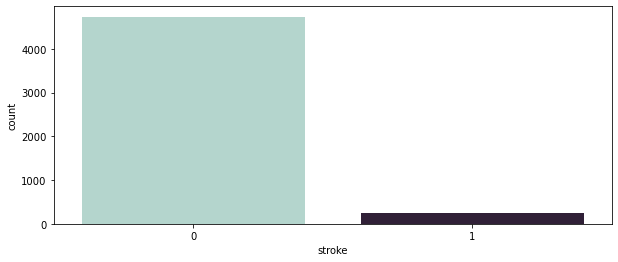

In [68]:
plt.figure(figsize=(10, 4))
sns.countplot(x='stroke', data=df, palette='ch:start=.5,rot=-.5,light=.8', order=[0, 1])
plt.xlabel('stroke')
plt.show()



Среди опрошенных гораздо меньше тех, кто пережил инсульт.

## Анализ признаков

### Тепловая карта с корреляцией признаков между собой

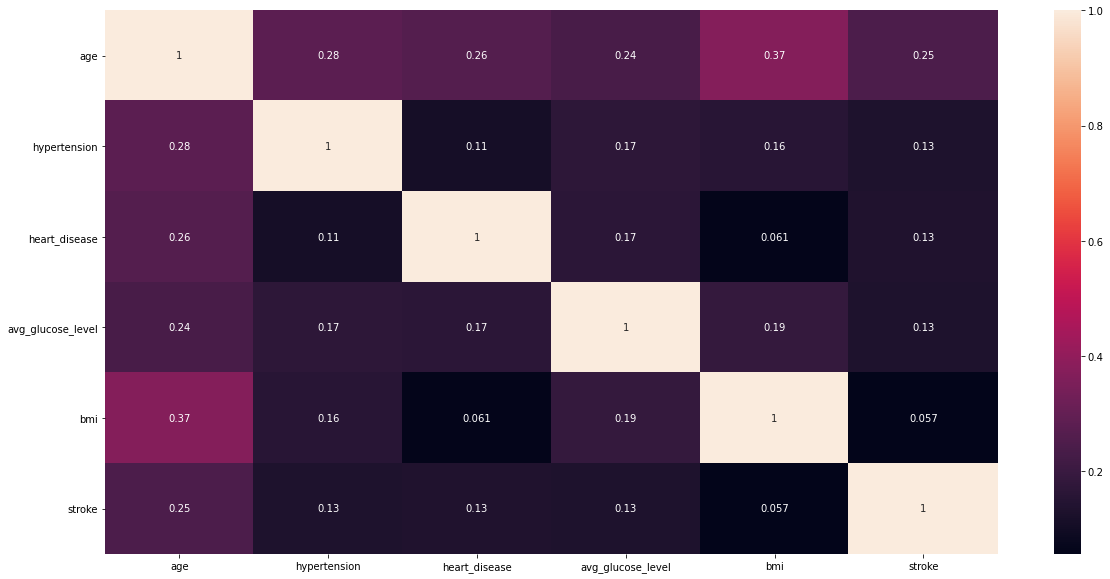

In [22]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

Попробуем определить, есть ли зависимость между показателями индекса массы тела (BMI), среднего уровня глюкозы и инсультом. Визуализируем данные и посмотрим, в каких пределах лежат показатели пациентов, переживших инсульт, и показатели глюкозы и BMI для остальных.

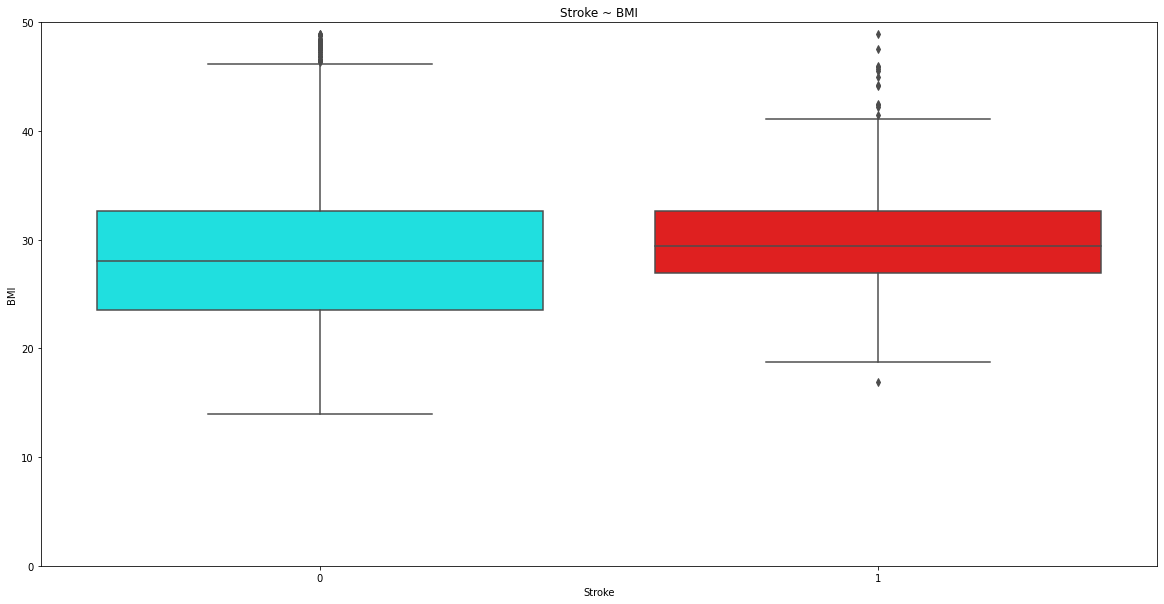

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='stroke', y='bmi', palette = {0:'cyan', 1:'red'})
plt.title("Stroke ~ BMI")
plt.xlabel("Stroke")
plt.ylabel("BMI")
plt.ylim(0, 50)
plt.show()

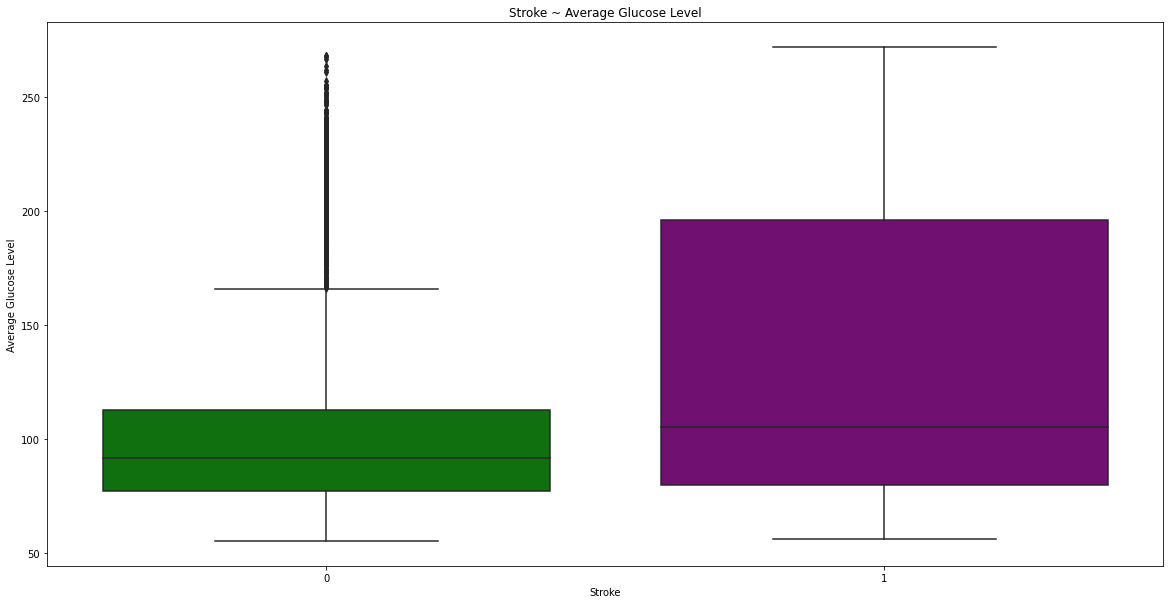

In [24]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette = {0:'green', 1:'purple'})
plt.title("Stroke ~ Average Glucose Level")
plt.xlabel("Stroke")
plt.ylabel("Average Glucose Level")
plt.show()

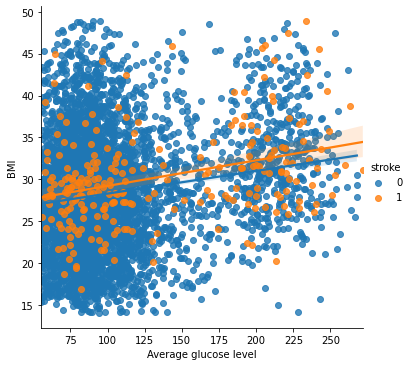

In [46]:
sns.lmplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df)

plt.xlabel('Average glucose level')
plt.ylabel('BMI')
plt.show()



По графикам можно видеть, что показатели BMI и среднего уровня глюкозы у пациентов с инсультом в целом выше. Однако если для уровня глюкозы эта разница читается довольно легко, то для BMI различие не так велико - среднее значение находится почти на одном уровне.

Выдвенем гипотезу о том, что **существует связь между индексом массы тела и инсультом**.

Значения BMI для людей с инсультом и без должны принадлежать разным выборкам.

# Методы оценки



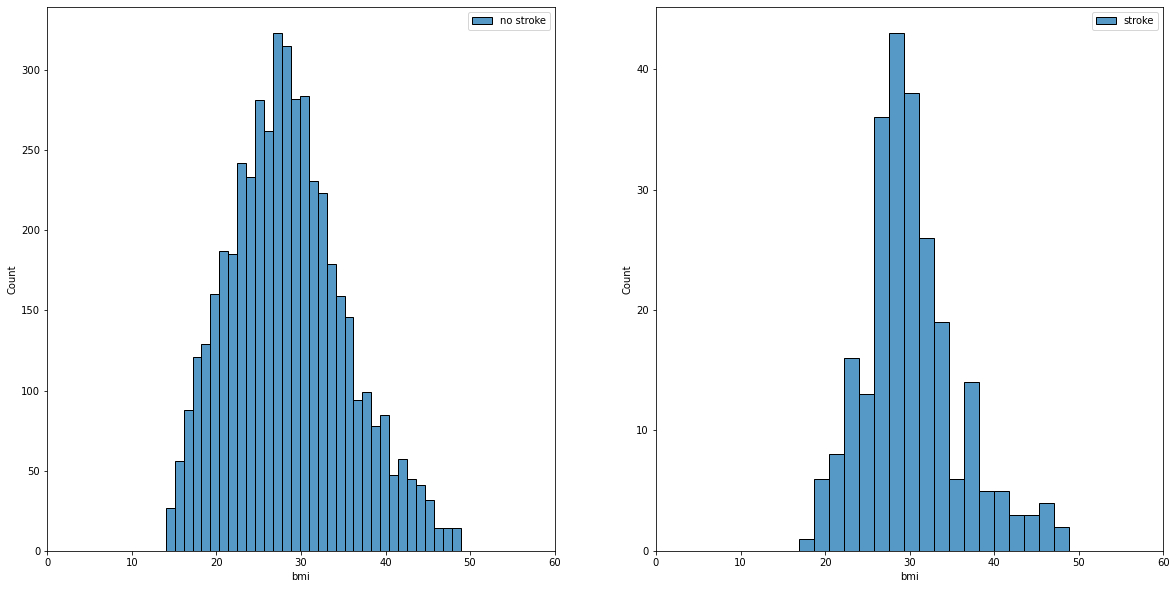

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
healthy = df.loc[df['stroke'] == 0]['bmi']
ill = df.loc[df['stroke'] == 1]['bmi']
sns.histplot(healthy, ax=axes[0])
axes[0].legend(["no stroke"])
axes[0].set_xlim(0, 60)
sns.histplot(ill, ax=axes[1])
axes[1].legend(["stroke"])
axes[1].set_xlim(0, 60)
plt.show()

In [49]:
print('Mean:')
print(f'Healthy - {healthy.mean()}; Ill - {ill.mean()}')
print('Median:')
print(f'Healthy - {healthy.median()}; Ill - {ill.median()}')

Mean:
Healthy - 28.409697866046955; Ill - 30.186693548387105
Median:
Healthy - 28.0; Ill - 29.45


Распределения и их среднее похожи. Действительно, таблица 1 показывает, что значения статистик близки. Для того, чтобы определить, как сильно, проведем t-test с уровнем значимости 0.05. Нулевая гипотеза в данном случае будет гласить, что средние равны. (Примем во внимание, что дисперсия в распределениях может быть разной)



In [54]:
test = stats.ttest_ind(healthy, ill, equal_var=False)
print(test)


Ttest_indResult(statistic=-4.766920237851907, pvalue=2.9816641340746633e-06)


In [53]:
p = stats.ttest_ind(healthy, ill, equal_var=False).pvalue

if p >= 0.05:
    print(p,'\n','Null hypothesis accepted')
else:
    print(p,'\n','Null hypothesis rejected')


2.9816641340746633e-06 
 Null hypothesis rejected


Полученное значение недостаточно высоко, для подтверждения нулевой гипотезы. Нельзя утвержать, что средние равны.

Посмотрим на доверитильные интервалы.

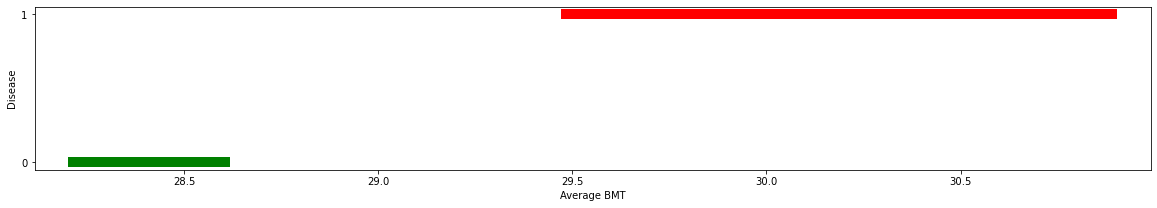

In [76]:
def get_conf_interval(r1):
    a = np.average(r1)
    se1 = a - 1.96 * np.std(r1) / np.sqrt(len(r1))
    se2 = a + 1.96 * np.std(r1) / np.sqrt(len(r1))
    return se1, se2

fig, ax = plt.subplots(1, 1, figsize=(20, 3))
se1 = get_conf_interval(healthy)
se2 = get_conf_interval(ill)
sns.lineplot(x=se1, y=[0, 0], color="g", linewidth=10)
sns.lineplot(x=se2, y=[1, 1], color="r", linewidth=10)
plt.xlim(min(se1[0], se2[0]) - 0.1, max(se1[1], se2[1]) + 0.1)
plt.xlabel("Average BMT")
plt.ylabel("Disease")
plt.yticks([0, 1])
plt.show()

In [74]:
def calcStatPower(data1, data2):
    delta = np.abs(np.average(data1) - np.average(data2))
    se = np.std(data1) / np.sqrt(len(data1))
    power = stats.norm.cdf(1.645 - delta / se)
    
    return power, power < 0.05

C:\Users\imphi\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\imphi\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(nan, False) (nan, nan) (nan, nan)
(0.6995299270158946, False) (25.434339965033814, 31.373993368299523) (27.682161901564847, 32.52617143176849)
(0.0695321511727089, False) (25.916387417124497, 29.434632991038768) (28.808750328111337, 32.15043334535805)
(0.33842007179763967, False) (27.14116269593673, 30.131810277036244) (28.742212485220083, 31.676706433698836)
(0.2922330163419236, False) (27.2288239655765, 29.799458862706334) (28.737479643482242, 31.165550659548064)
(0.2711131494703862, False) (27.258411227137263, 29.678685547056286) (28.815141145442823, 30.90582659649266)
(0.39176547371856213, False) (27.743915536786748, 30.111489868618644) (29.123821520945214, 31.050502803379104)
(0.3944852219911465, False) (28.161970223870718, 30.401035556476103) (29.480031966925697, 31.26794491168702)
(0.43021107146906623, False) (28.284155168399774, 30.338067053822446) (29.430788825065395, 31.099514205237636)
(0.0750052545190376, False) (27.916011435845043, 29.80237421437917) (29.572564463227845, 

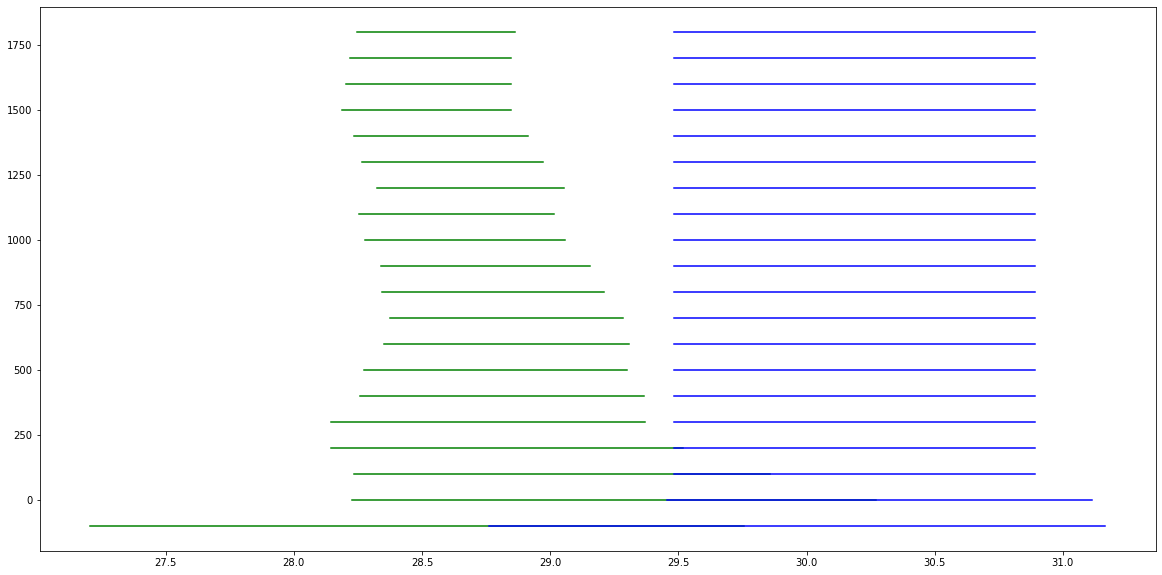

In [80]:
num_range = 20

for i in range(num_range):
    e = i * min(len(healthy), len(ill)) // 10
    print(calcStatPower(healthy[: e], ill[: e]), 
          get_conf_interval(healthy[: e]), 
          get_conf_interval(ill[: e]))
    
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

for i in range(num_range):
    e = (i+1)*100
    sns.lineplot(x=get_conf_interval(healthy[: e]), y=[e - 200, e - 200], color="g", ax=ax)
    sns.lineplot(x=get_conf_interval(ill[: e]), y=[e - 200, e - 200], color="b", ax=ax)
    